In [1]:
import numpy as np  
import pandas as pd
from sklearn.cluster import KMeans  
from matplotlib import pyplot as plt  
import seaborn as sns
%matplotlib inline  

In [2]:
## https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv
dataset = pd.read_csv(r'C:\Users\mg\Desktop\ML Projects\Datasets\Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

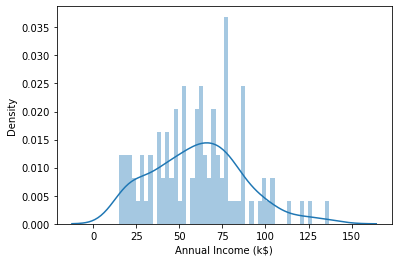

In [7]:
sns.distplot(dataset['Annual Income (k$)'], kde = True, bins = 50)

C:\Users\mg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

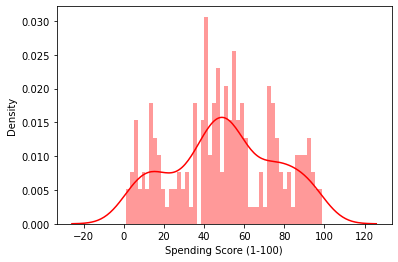

In [9]:
sns.distplot(dataset['Spending Score (1-100)'], kde = True, bins = 50, color = 'red')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

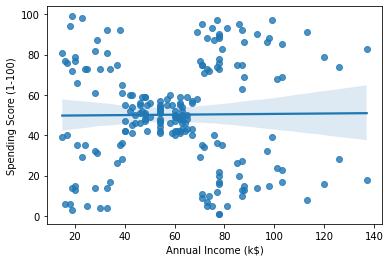

In [10]:
sns.regplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = dataset)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

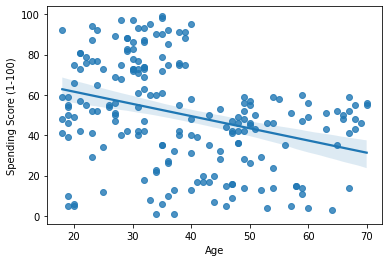

In [11]:
sns.regplot(x = 'Age', y = 'Spending Score (1-100)', data = dataset)

In [13]:
dataset = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
km_model = KMeans(n_clusters = 5)
km_model.fit(dataset)

KMeans(n_clusters=5)

In [22]:
print(km_model.cluster_centers_)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


In [23]:
print(km_model.labels_)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


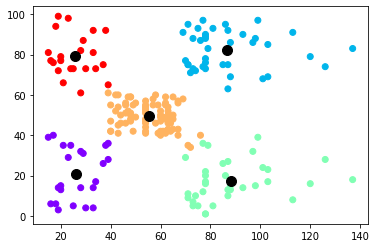

In [24]:
plt.scatter(dataset.values[:,0], dataset.values[:,1], c = km_model.labels_, cmap= 'rainbow')

plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s = 100, c = 'black')

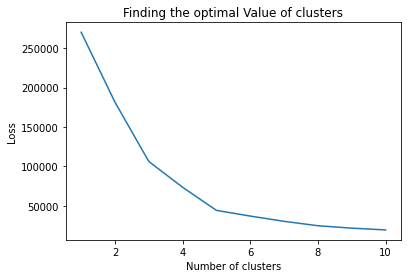

In [20]:
loss = []
for i in range(1,11):
    km_model = KMeans(n_clusters = i)
    km_model.fit(dataset)
    loss.append(km_model.inertia_)
    

plt.plot(range(1,11), loss)
plt.title('Finding the optimal Value of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.show()

In [25]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['cluster'] = km_model.labels_
cluster_map

,data_index,cluster
0,0,0
1,1,4
2,2,0
3,3,4
4,4,0
...,...,...
195,195,1
196,196,2
197,197,1
198,198,2
